In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

housing = pd.read_csv('../data/Ames_Housing_Price_Data.csv', index_col=0)
housing.shape

(2580, 81)

In [34]:
pd.set_option('display.max_columns', None)
housing.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [35]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [36]:
#dropping columns we don't need
housing.drop(['MSSubClass','GarageYrBlt', 'GarageArea', 'Street', 'LotShape', 'LandContour',\
              'LandSlope', 'MoSold','SaleType','SaleCondition']
             , axis=1, inplace=True)

In [37]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSZoning', 'LotFrontage', 'LotArea',
       'Alley', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'P

In [38]:
#Calculating missing nums
import numpy as np
nans = np.sum(housing.isnull())
nans[nans > 0].sort_values(ascending=False)

## 'MiscFeature', 'Alley', 'PoolQC' - no data. Also, as a 
# company that performs cosmetic restoration we don't have control over those - get rid of them?

PoolQC          2571
MiscFeature     2483
Alley           2412
Fence           2055
FireplaceQu     1241
LotFrontage      462
GarageFinish     129
GarageQual       129
GarageCond       129
GarageType       127
BsmtExposure      71
BsmtFinType2      70
BsmtFinType1      69
BsmtCond          69
BsmtQual          69
MasVnrArea        14
MasVnrType        14
BsmtFullBath       2
BsmtHalfBath       2
Electrical         1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
GarageCars         1
TotalBsmtSF        1
dtype: int64

In [39]:
#imputing zeroes
for x in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    housing[x] = housing[x].fillna(0)
for x in ('GarageType','GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond'):
    housing[x] = housing[x].fillna(0)
print(housing['BsmtHalfBath'].unique())
housing['GarageType'].unique()

[0. 1. 2.]


array(['Detchd', 'Attchd', 'BuiltIn', 'Basment', 0, '2Types', 'CarPort'],
      dtype=object)

In [40]:
#Imputing by Neighborhood median?
housing["LotFrontage"] = housing.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [41]:
housing["Fence"].unique()

array([nan, 'GdWo', 'MnPrv', 'GdPrv', 'MnWw'], dtype=object)

In [42]:
# housing.Fence.fillna(0,inplace=True)?? could impute by Neighborhood? (categorical column, not numeric)
#by Neighborhood mode?
housing['Fence'] = housing['Fence'].map({np.nan: 0, 'MnWw': 1, 'GdWo': 2, 'MnWw': 3, 'GdPrv': 4})#.astype(int)

In [43]:
bsmt_related = housing[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','SalePrice']]
bsmt_related .head(2)

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,SalePrice
1,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,126000
2,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,139500


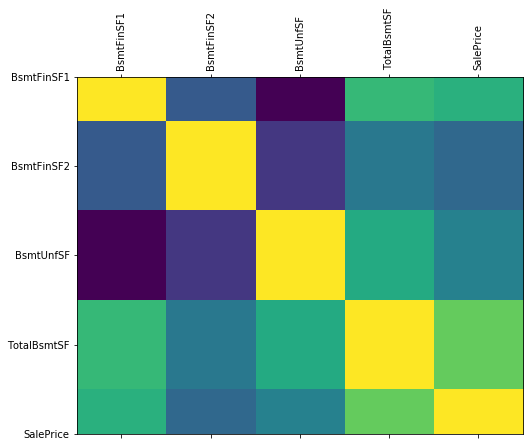

In [44]:
import seaborn as sns
corr =bsmt_related.corr()
#corr = pd.concat([bsmt_related_filled, housing['SalePrice']], axis=1).corr()
fix, ax = plt.subplots(figsize=(8,8))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
plt.yticks(range(len(corr.columns)), corr.columns);

In [45]:
print(bsmt_related['BsmtQual'].unique())
print(bsmt_related['BsmtCond'].unique())
print(bsmt_related['BsmtFinType1'].unique())
print(bsmt_related['BsmtExposure'].unique())
print(bsmt_related['BsmtFinType2'].unique())

['TA' 'Gd' 'Fa' nan 'Ex' 'Po']
['TA' nan 'Fa' 'Gd' 'Ex' 'Po']
['Rec' 'GLQ' 'ALQ' 'Unf' nan 'BLQ' 'LwQ']
['No' 'Mn' nan 'Gd' 'Av']
['Unf' 'ALQ' nan 'GLQ' 'BLQ' 'LwQ' 'Rec']


In [46]:
bsmt_related.BsmtExposure.replace({'NA':0, 'No':0, 'Mn':1, 'Av':4, 'Gd':5}, inplace=True)
bsmt_related.BsmtQual.replace({'NA':0,'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
bsmt_related.BsmtCond.replace({'NA':0,'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
bsmt_related.BsmtFinType1.replace({'NA':0,'Unf':1, 'LwQ':1, 'BLQ':2, 'Rec':3, 'ALQ':3,'GLQ':4}, inplace=True)
bsmt_related.BsmtFinType2.replace({'NA':0,'Unf':1, 'LwQ':1, 'BLQ':2, 'Rec':3, 'ALQ':3,'GLQ':4}, inplace=True)

/Users/ki/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [47]:
print(bsmt_related['BsmtQual'].unique())
print(bsmt_related['BsmtCond'].unique())
print(bsmt_related['BsmtFinType1'].unique())
print(bsmt_related['BsmtExposure'].unique())
print(bsmt_related['BsmtFinType2'].unique())

[ 3.  4.  2. nan  5.  1.]
[ 3. nan  2.  4.  5.  1.]
[ 3.  4.  1. nan  2.]
[ 0.  1. nan  5.  4.]
[ 1.  3. nan  4.  2.]


In [48]:
bsmt_related.isnull().sum(axis=0)

BsmtQual        69
BsmtCond        69
BsmtExposure    71
BsmtFinType1    69
BsmtFinSF1       0
BsmtFinType2    70
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
SalePrice        0
dtype: int64

In [49]:
for x in bsmt_related:
    bsmt_related[x] = bsmt_related[x].fillna(0)

/Users/ki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [50]:
bsmt_related.isnull().sum(axis=0)

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [51]:
bsmt_related = bsmt_related.drop('BsmtUnfSF',axis=1)

In [52]:
bsmt_related

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,SalePrice
1,3.0,3.0,0.0,3.0,238.0,1.0,0.0,856.0,126000
2,4.0,3.0,1.0,4.0,552.0,3.0,393.0,1049.0,139500
3,3.0,3.0,0.0,3.0,737.0,1.0,0.0,837.0,124900
4,2.0,3.0,0.0,1.0,0.0,1.0,0.0,405.0,114000
5,4.0,3.0,0.0,4.0,643.0,1.0,0.0,810.0,227000
...,...,...,...,...,...,...,...,...,...
759,3.0,3.0,0.0,1.0,0.0,1.0,0.0,952.0,121000
760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,139600
761,3.0,3.0,0.0,2.0,284.0,1.0,0.0,1001.0,145000
762,4.0,3.0,0.0,4.0,841.0,1.0,0.0,985.0,217500


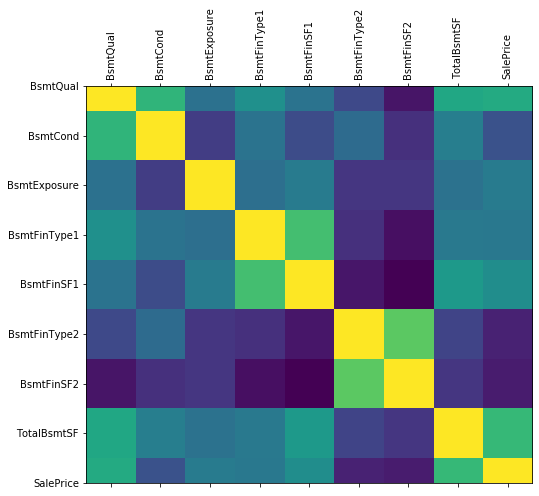

In [53]:
import seaborn as sns
corr =bsmt_related.corr()
#corr = pd.concat([bsmt_related_filled, housing['SalePrice']], axis=1).corr()
fix, ax = plt.subplots(figsize=(8,8))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
plt.yticks(range(len(corr.columns)), corr.columns);

In [54]:
from sklearn.linear_model import Lasso

X = bsmt_related.drop('SalePrice',axis=1) # features
y = housing['SalePrice'] 

In [57]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel, f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [59]:
num_f = 3# number of features to select
# SelectFromModel -> Meta-transformer for selecting features based on importance weights.
embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1", solver='liblinear'), max_features=num_f)
# Penalty="l1" -> indicates regularization using L1
embeded_lr_selector.fit(X, y) # Fit the SelectFromModel meta-transformer.

embeded_lr_support = embeded_lr_selector.get_support() # Get a mask, or integer index, of the features selected
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist() # List of features
print(str(len(embeded_lr_feature)), 'selected features')

3 selected features


In [60]:
embeded_lr_feature

['BsmtQual', 'BsmtCond', 'BsmtExposure']

### Plan 
Do the scatterplot of all houses to check for outliers<br>
Get rid of outliers if necessary (later feed the model including excluding the outliers for additional check)<br>
Check MSZoning - try to change the parameters into 1,2,3,4,5<br>
What to select - neighborhoods or MSZoning? Both are more or less the same<br>
Separate to clusters of features (done)<br>
Run the correlation to the price and MSZoning on each cluster<br> 
Run multicollinearity matrix on each <br>
Clean/impute missing values<br>
Make suggestions on feature generation<br>
Feed the clusters into one of the models. Select 2-3 features from each cluster<br>


In [165]:
housing.sort_values(by = 'SalePrice', ascending = False)[:5]

,PID,GrLivArea,SalePrice,MSZoning,LotFrontage,LotArea,Alley,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,YrSold
8,528351010,4316,755000,RL,104.0,21535,NaN,AllPub,Corner,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,5,3,PConc,5.0,3.0,Gd,GLQ,1455.0,Unf,0.0,989.0,2444.0,GasA,5,Y,SBrkr,2444,1872,0,0.0,1.0,3,1,4,1,Ex,10,Typ,2,5.0,Attchd,3.0,3.0,3.0,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,2007
326,528320060,3627,625000,RL,118.0,35760,NaN,AllPub,CulDSac,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,4,4,PConc,5.0,3.0,Gd,GLQ,1387.0,Unf,0.0,543.0,1930.0,GasA,5,Y,SBrkr,1831,1796,0,1.0,0.0,3,1,4,1,Gd,10,Typ,1,3.0,Attchd,3.0,3.0,3.0,TA,Y,361,76,0,0,0,0,NaN,NaN,NaN,0,2006
66,528164060,2470,615000,RL,106.0,12720,NaN,AllPub,Inside,NridgHt,Norm,Norm,1Fam,1Story,10,5,2003,2003,Hip,CompShg,MetalSd,MetalSd,Stone,680.0,5,3,PConc,5.0,3.0,Gd,GLQ,2257.0,Unf,0.0,278.0,2535.0,GasA,5,Y,SBrkr,2470,0,0,2.0,0.0,1,1,1,1,Ex,7,Typ,2,4.0,Attchd,3.0,3.0,3.0,TA,Y,154,65,0,0,216,144,Ex,NaN,NaN,0,2008
585,528150070,2364,611657,RL,100.0,12919,NaN,AllPub,Inside,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,5,3,PConc,5.0,3.0,Gd,GLQ,2188.0,Unf,0.0,142.0,2330.0,GasA,5,Y,SBrkr,2364,0,0,1.0,0.0,2,1,2,1,Ex,11,Typ,2,4.0,Attchd,3.0,3.0,3.0,TA,Y,0,67,0,0,0,0,NaN,NaN,NaN,0,2010
640,528110020,2674,610000,RL,105.0,13693,NaN,AllPub,Inside,NridgHt,PosA,PosA,1Fam,1Story,10,5,2007,2007,Hip,CompShg,VinylSd,VinylSd,Stone,472.0,5,3,PConc,5.0,3.0,Gd,GLQ,2288.0,Unf,0.0,342.0,2630.0,GasA,5,Y,SBrkr,2674,0,0,2.0,0.0,2,1,2,1,Ex,8,Typ,2,4.0,Attchd,3.0,3.0,3.0,TA,Y,360,50,0,0,0,0,NaN,NaN,NaN,0,2009


In [166]:
housing.sort_values(by = 'SalePrice', ascending = False)[-5:]

,PID,GrLivArea,SalePrice,MSZoning,LotFrontage,LotArea,Alley,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,YrSold
918,534450090,334,39300,RL,50.0,5000,NaN,AllPub,Inside,BrkSide,Norm,Norm,1Fam,1Story,1,3,1946,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,2,N,FuseF,334,0,0,0.0,0.0,1,0,1,1,Fa,2,Typ,0,NaN,NaN,NaN,0.0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,2007
645,911175430,480,35311,C (all),50.0,9000,NaN,AllPub,Inside,IDOTRR,Norm,Norm,1Fam,1Story,2,3,1949,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,3,3,CBlock,3.0,3.0,Av,BLQ,50.0,Unf,0.0,430.0,480.0,GasA,3,N,FuseA,480,0,0,1.0,0.0,0,0,1,1,TA,4,Typ,0,NaN,Detchd,1.0,1.0,3.0,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2006
336,909101330,498,35000,RL,60.0,8088,Grvl,AllPub,Inside,Edwards,Feedr,Norm,1Fam,1Story,2,3,1922,1955,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,BrkTil,3.0,3.0,No,Unf,0.0,Unf,0.0,498.0,498.0,GasA,3,N,FuseF,498,0,0,0.0,0.0,1,0,1,1,TA,3,Typ,0,NaN,Detchd,1.0,1.0,2.0,Fa,N,0,0,100,0,0,0,NaN,NaN,NaN,0,2006
559,902477120,720,34900,C (all),60.0,7879,NaN,AllPub,Inside,IDOTRR,Norm,Norm,1Fam,1Story,4,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3,3,CBlock,3.0,3.0,No,Rec,495.0,Unf,0.0,225.0,720.0,GasA,3,N,FuseA,720,0,0,0.0,0.0,1,0,2,1,TA,4,Typ,0,NaN,NaN,NaN,0.0,NaN,NaN,N,0,523,115,0,0,0,NaN,GdWo,NaN,0,2009
428,902207130,832,12789,RM,68.0,9656,NaN,AllPub,Inside,OldTown,Norm,Norm,1Fam,1Story,2,2,1923,1970,Gable,CompShg,AsbShng,AsbShng,None,0.0,3,2,BrkTil,2.0,2.0,No,Unf,0.0,Unf,0.0,678.0,678.0,GasA,3,N,SBrkr,832,0,0,0.0,0.0,1,0,2,1,TA,5,Typ,1,4.0,Detchd,1.0,2.0,2.0,Fa,N,0,0,0,0,0,0,NaN,NaN,NaN,0,2010


In [137]:
#getting rid of the highest-priced and lowest-priced outliers
high_priced_house = housing.index.isin([8])
low_priced_house = housing.index.isin([428])
housing2=housing[~high_priced_house]
housing2=housing[~low_priced_house]

In [138]:
#housing2.head(10)

In [139]:
housing2.groupby('MSZoning')['SalePrice'].mean().sort_values(ascending = False)#.plot(kind='barh')

MSZoning
FV         216343.053097
RL         187999.338983
RH         131639.714286
RM         127350.431655
A (agr)     81500.000000
C (all)     80700.647059
I (all)     80312.500000
Name: SalePrice, dtype: float64

In [140]:
housing2.MSZoning.replace({'A (agr)':1, 'C (all)':1,'I (all)':1, 'RM':2, 'RH':3, 'RL':4, 'FV':5}, inplace = True)

In [141]:
#housing.MSZoning

### Data Analysis Ideas Beyond Basic EDA

Central Question: 
    
The simple linear model based on GrLivArea points to  𝑝𝑟𝑖𝑐𝑒/𝑓𝑡2  as an important derived target. On the other hand, the fan-like price/square-foot scatterplot implies that different houses have a wide range of  𝑝𝑟𝑖𝑐𝑒/𝑓𝑡2 . We would like to study the major driving factors for these Ames homes to have significantly different  𝑝𝑟𝑖𝑐𝑒/𝑓𝑡2 .


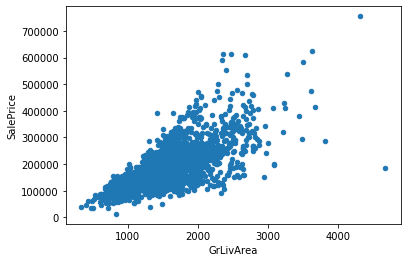

In [146]:
#from Aiko's Project Proposal
housing[['GrLivArea', 'SalePrice']].plot(kind='scatter', x='GrLivArea', y='SalePrice')

No matter which local housing market we inspect, the house prices are the on-going consensus among the home-buyers and the home-sellers depending on the supply and demand of the current house market. The house market supply and demand is influnced by the local labor market/economical condition, job creation, population density, interest rate, price momentum, etc. Among all the area related features (e.g. 1st floor area, 2nd floor area, basement finished area, etc.), do the local home buyers show some preference towards some features over the others? In other words, are the home buyers willing to spend an equal amount for one square-foot of 1st floor living space, 2nd floor living space, deck space, finished basement space, etc.?

Frame your study using multiple linear regression and interpret your findings in terms of the price discounts. Consider the following points:

Which of the house styles, ranch or colonial, is more popular in terms of the house prices?

What is the popularity in terms of the housing inventory (based on the available data)?

Does the house price sensitivity on 2ndFlrSF depend on the house style (1st story excluded)?

How is GrLivArea engineered from the other area-related feature? 

If you would design a gross area feature (to replace GrLivArea) for the purpose of descriptive modeling, what would you do? What are the pros and cons when aggregating several features together?
Do home buyers value upstairs bathrooms and basement bathrooms equally?

Do they price 'half-bath' as one half of a full bath? 
Based on your finding, how would you design an aggregate bathroom feature?

How much premium were the Ames home buyers (back in  2006−2010 ) willing to pay for a swimming-pool, an open deck, or an enclosed porch? Did the home buyers value the optional additions based on their sizes?
How important is a garage in adding value to the houses? 

How about the differences between an attached vs. detached garage?

Are there feature combinations which increase the house values? 

What are the feature combinations which drive the house values down (making the house less desriable)?

House Quality/Condition: The Ames dataset grades each house by the appearance, kitchen, basement, garage, heating, fireplace, .... and finally an overall quality/condition.
How are the overall quality/condition features engineered from the individual quality/condition metrics?

How do these metrics' importances affect local house prices?

To what extent does the curb appeal affect the house prices?

Does home remodeling add value to the houses? For example, how do the old houses which were remodeled in the 1990s compare to the houses which were built in the 1990s

In [206]:
##How to see if remodel ups the price?
housing.loc[housing['YearRemodAdd']==housing['YrSold']]#['YearRemodAdd'].unique()

,PID,GrLivArea,SalePrice,MSZoning,LotFrontage,LotArea,Alley,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,YrSold
3,911128020,1001,124900,C (all),60.0,6060,NaN,AllPub,Inside,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,4,3,BrkTil,3.0,3.0,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,5,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1.0,1.0,3.0,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,2007
8,528228540,1246,187687,RL,53.0,3710,NaN,AllPub,Inside,Blmngtn,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,WdShing,Wd Shng,BrkFace,20.0,4,3,PConc,4.0,3.0,Gd,Unf,0.0,Unf,0.0,1146.0,1146.0,GasA,5,Y,SBrkr,1246,0,0,0.0,0.0,2,0,2,1,Gd,5,Typ,1,4.0,Attchd,3.0,2.0,3.0,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,2008
17,906380120,1274,203000,RL,68.0,8814,NaN,AllPub,Inside,CollgCr,Norm,Norm,1Fam,1Story,7,5,2005,2007,Gable,CompShg,VinylSd,VinylSd,BrkFace,80.0,4,3,PConc,4.0,3.0,No,GLQ,925.0,Unf,0.0,349.0,1274.0,GasA,5,Y,SBrkr,1274,0,0,1.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2.0,2.0,3.0,TA,Y,264,98,0,0,0,0,NaN,NaN,NaN,0,2007
26,528218100,1458,168165,RL,58.0,13204,NaN,AllPub,Inside,Gilbert,RRAn,Norm,1Fam,2Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,Stone,44.0,3,3,PConc,4.0,3.0,No,Unf,0.0,Unf,0.0,608.0,608.0,GasA,5,Y,SBrkr,608,850,0,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,BuiltIn,3.0,2.0,3.0,TA,Y,100,33,0,0,0,0,NaN,NaN,NaN,0,2007
32,528222090,1258,173500,RL,64.0,7697,NaN,AllPub,Inside,Gilbert,Norm,Norm,1Fam,1Story,7,6,2007,2007,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.0,4,3,PConc,4.0,3.0,No,Unf,0.0,Unf,0.0,1246.0,1246.0,GasA,5,Y,SBrkr,1258,0,0,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2.0,2.0,3.0,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,906385020,1222,187000,RL,64.0,7360,NaN,AllPub,Inside,CollgCr,Norm,Norm,1Fam,1Story,7,5,2010,2010,Gable,CompShg,VinylSd,VinylSd,Stone,80.0,4,3,PConc,4.0,3.0,No,GLQ,24.0,Unf,0.0,1198.0,1222.0,GasA,5,Y,SBrkr,1222,0,0,0.0,0.0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2.0,2.0,3.0,TA,Y,0,54,0,0,0,0,NaN,NaN,NaN,0,2010
456,909100150,1292,108000,RL,67.0,5142,NaN,AllPub,Inside,Edwards,Norm,Norm,1Fam,1.5Fin,4,7,1923,2008,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3,3,PConc,3.0,3.0,No,ALQ,224.0,Unf,0.0,725.0,949.0,GasA,3,Y,SBrkr,949,343,0,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Detchd,1.0,1.0,3.0,TA,N,0,0,183,0,0,0,NaN,NaN,NaN,0,2008
496,906201130,2132,316600,RL,79.0,12327,NaN,AllPub,Inside,SawyerW,Norm,Norm,1Fam,1.5Fin,8,8,1983,2009,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,4,3,CBlock,4.0,3.0,Gd,GLQ,1441.0,Unf,0.0,55.0,1496.0,GasA,5,Y,SBrkr,1496,636,0,1.0,0.0,1,1,1,1,Gd,5,Min2,1,4.0,BuiltIn,3.0,2.0,4.0,TA,Y,349,40,0,0,0,0,NaN,NaN,NaN,0,2009
553,534202130,912,147000,RL,72.0,8872,NaN,AllPub,Corner,NAmes,Norm,Norm,1Fam,1Story,5,8,1965,2008,Gable,CompShg,VinylSd,VinylSd,BrkFace,300.0,3,3,CBlock,3.0,3.0,No,ALQ,595.0,Unf,0.0,317.0,912.0,GasA,5,Y,SBrkr,912,0,0,1.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1.0,2.0,3.0,TA,Y,0,240,0,0,0,0,NaN,NaN,NaN,0,2008


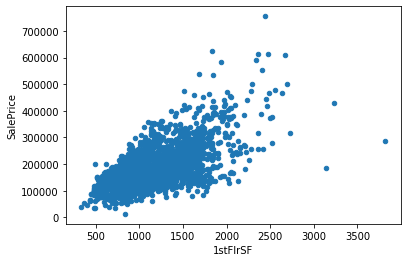

In [155]:
housing[['1stFlrSF', 'SalePrice']].plot(kind='scatter', x='1stFlrSF', y='SalePrice')

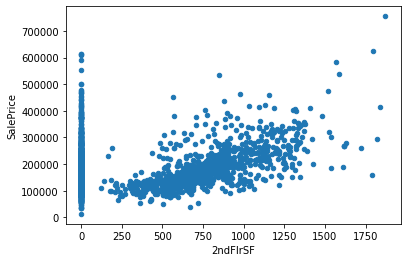

In [156]:
housing[['2ndFlrSF', 'SalePrice']].plot(kind='scatter', x='2ndFlrSF', y='SalePrice')

### Engineering Features

In [274]:
#Adding Pool to Misc Features?
housing.loc[(housing.PoolArea>0), ['MiscFeature']] = 'Pool'
housing.loc[(housing.PoolArea>0), ['MiscVal']] = housing.loc[(housing.PoolArea>0), 
                                                               ['MiscVal', 'PoolArea']].\
                                                                apply(lambda x: (x.MiscVal + x.PoolArea), axis=1)

In [307]:
housing['Year.Diff'] = housing['YrSold']- housing['YearRemodAdd']
housing.loc[housing['Year.Diff']<5]['SalePrice']#= housing['Process.Time'].dt.days

3      124900
8      187687
10     140000
11     219500
17     203000
        ...  
717    137900
728    161000
732    110000
749    171900
758    196500
Name: SalePrice, Length: 565, dtype: int64

In [310]:
housing['PID'].count()

2580